In [1]:
import imageio
import cv2 as cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# UFO example

Pentagon Confirms That Leaked Video Is Part of UFO Investigation: https://futurism.com/leaked-video-unidentified-objects-swarming-navy-warship

Can we make our own UFO video?


In [2]:
# Dimensions of our video
h,w = 240, 360

In [3]:
# Params of our video
fps = 10
duration = 3 # duration

In [4]:
# How many UFOs do we want?
N_ufos = 3

# Let's generate some linear path for them
slopes = np.random.uniform(-4, 4, N_ufos)
rand_h_init = np.uint8(np.random.uniform(h//4, 3*h//4, N_ufos))
rand_w_init = np.uint8(np.random.uniform(w//4, 3*w//4, N_ufos))

# Give them random intensities
intensities = [0.4, 0.7, 1]

In [5]:
rand_h_init

array([128, 185, 149], dtype=uint8)

In [6]:
# Make a noisy background of an intensity image
# Let's use read noise which is around 10% of the pixel value
imgs = np.random.randint(0, high=4, size=(h, w, fps * duration), dtype=np.uint8)
imgs = np.float32(imgs)
imgs = imgs/255
print(imgs.shape)

(360, 480, 30)


In [7]:
# Let's add in a time dimension and a bunch of random flickers
flicker = 10
t = np.arange(0, duration*fps)
for step in range(fps*duration):
  for n in range(N_ufos):
    imgs[
        rand_h_init[n]+int(slopes[n]*step)+np.random.randint(-flicker, high=flicker),
         rand_w_init[n]+int(slopes[n]*step)+np.random.randint(-flicker, high=flicker),
         step] = intensities[n] - np.abs(0.2*np.sin(t[step]+n/5))

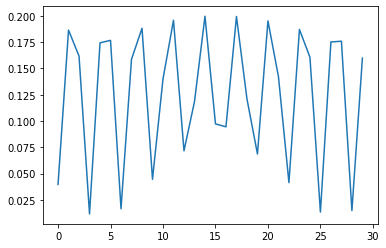

In [8]:
plt.plot(t, np.abs(0.2*np.sin(t+n/10)))

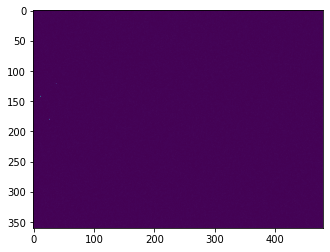

In [9]:
plt.imshow(imgs[..., 1])

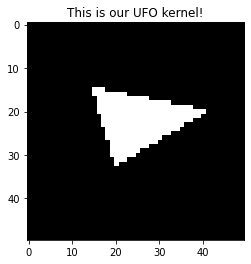

In [10]:
# draw a triangle: https://stackoverflow.com/a/55747862/6722938
img_rgb = np.zeros((50, 50))
vertices = np.array([[15, 15], [40, 20], [20, 32]], np.int32)
pts = vertices.reshape((-1, 1, 2))
cv2.polylines(img_rgb, [pts], isClosed=True, color=1, thickness=1)
cv2.fillPoly(img_rgb, [pts], color=1)

img_rgb = np.float32(img_rgb)
img_rgb = img_rgb/np.max(img_rgb)

# show our triangle
plt.title("This is our UFO kernel!")
plt.imshow(img_rgb, cmap='gray')

In [11]:
# Make synthetic blur image
ufo_vid = np.zeros((h, w, fps * duration), dtype=np.float32)
for step in range(fps*duration):
  # convolve with aperture
  temp = signal.convolve2d(imgs[...,step], img_rgb, boundary='symm', mode='same')

  # convolve with gaussian to get blurred
  blurred = gaussian_filter(temp, sigma=3)

  # Add some noise
  noisy = blurred + 0.2*np.random.uniform(low=0.0, high=1.0, size=(h,w))
  ufo_vid[...,step] = noisy/noisy.max()

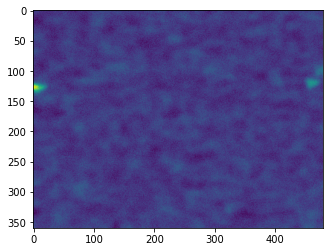

In [12]:
plt.imshow(ufo_vid[..., 12])

In [13]:
np.stack((ufo_vid[...,step], ufo_vid[...,step], ufo_vid[...,step]), axis=-1).shape
empty = np.zeros(ufo_vid[...,step].shape)

In [14]:
gif = imageio.get_writer('ufo.gif',mode='I')
for step in range(fps*duration):
  gif.append_data(np.uint8(255*np.stack((ufo_vid[...,step]*0.3, ufo_vid[...,step], ufo_vid[...,step]*0.3), axis=-1)))
gif.close()